In [1]:
import pandas as pd

In [ ]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [2]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS"  #NSE stocks usually end with .NS
#download stock data
stk_data = yf.download(stock_symbol,start="2023-01-01",end="2023-07-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [4]:
stk_data

Price,Open,High,Low,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,
2023-01-02,1172.682090,1186.018524,1171.854325,1184.592896
2023-01-03,1179.603215,1183.259245,1171.670422,1175.924194
2023-01-04,1175.901284,1177.763846,1156.126654,1158.219116
2023-01-05,1160.495513,1166.427926,1151.527923,1156.149658
2023-01-06,1161.944019,1171.739373,1158.104068,1166.657715
...,...,...,...,...
2023-06-23,1162.978723,1165.048194,1155.206860,1156.471558
2023-06-26,1152.907547,1156.770489,1144.491840,1147.641968


In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (122, 1)


In [6]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

116
X_train length: (116, 1)
X_test length: (6, 1)
y_train length: (116, 1)
y_test length: (6, 1)


In [7]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.3426775164005739
maPe-Testset: 99.18032369496494
RMSE-Testset: 0.10863972593827771
maPe-Testset: 20735664.83249837
RMSE-Testset: 0.012054234398449052
maPe-Testset: 43118388.33348358


C:\Anaconda3\envs\aidl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE-Testset: 0.012072439315915267
maPe-Testset: 43286988.71747321


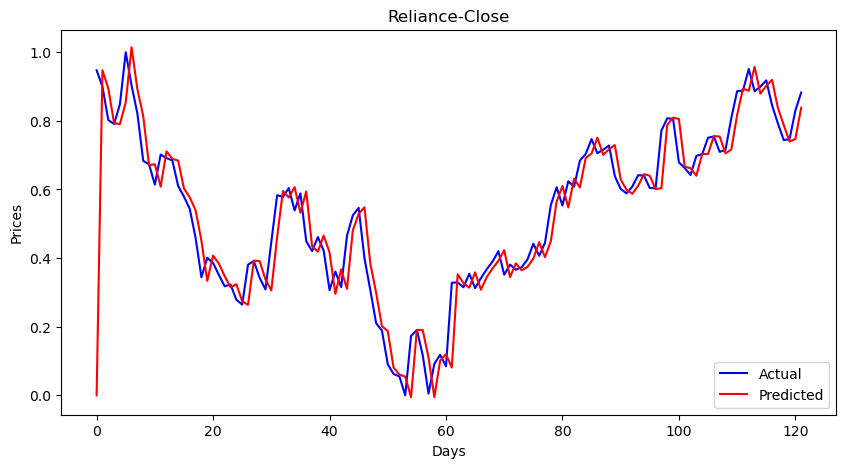

In [8]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Reliance-Close","Days","Prices")

In [9]:
len(data1)

122

In [10]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [11]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

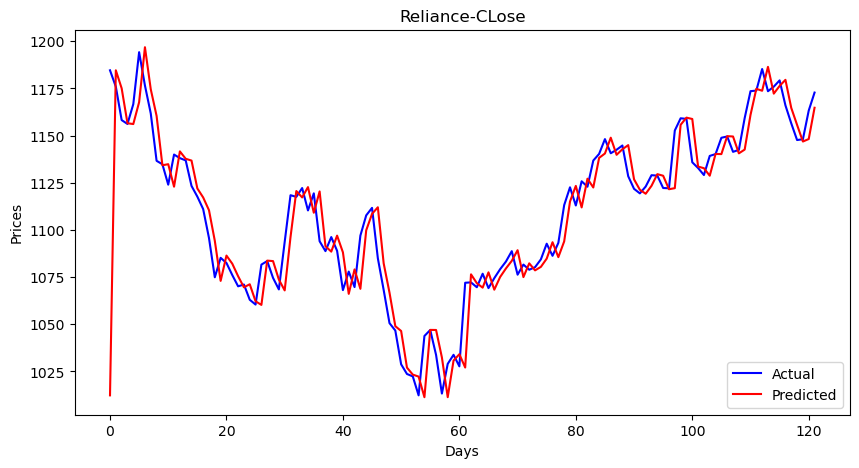

In [12]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-CLose","Days","Prices")

In [13]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 399.46408696802075
maPe-Testset: 0.9719909655262686


(399.46408696802075, 0.9719909655262686)

In [14]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [15]:
forecast

array([0.88671888, 0.88672733])

In [16]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [17]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [18]:
forecast_stock_price_test_oriF

,Closefore
0,1173.597976
1,1173.599514


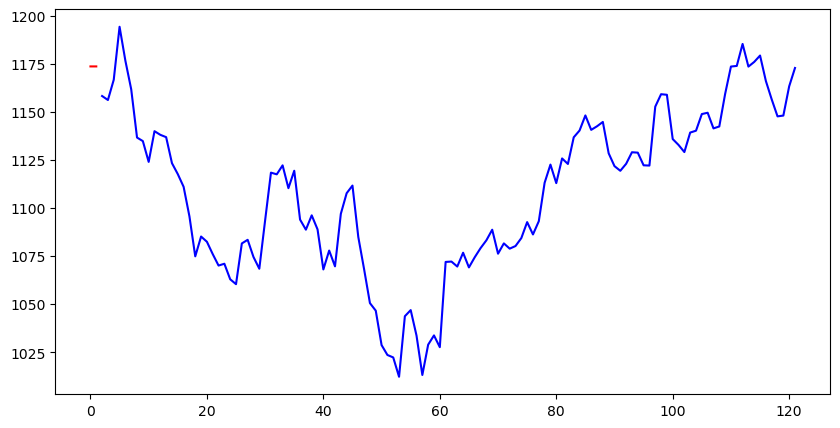

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
